# Exploratory Data Analysis

In this assignment we will work with data about the Titanic's passengers.

Objectives:
* to familiarize you with the seaborn library
* learn how to build different visualizations
* fill the gaps in the data
* encode categorical data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's load the data.

In [4]:
df = pd.read_csv("titanic (1).csv")

### Task 1 (0.5pt)
Display the first 7 rows of the table and the table dimensions.

In [9]:
print(df.head(7))
print(df.shape)

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   
5          NaN       NaN     NaN   
6          7.0       0.0     1.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0    1.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen; Miss. Laina  female  26.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen; Mr. William Henry    male  35.0    0.0   
5                                                NaN     NaN   NaN    NaN   
6                            McCarthy; Mr. Timothy J    male  54.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN

# Feature Processing

1) Find columns that have missing values and process these missing values

2) Translate categorical features into numerical

### Task 2 (0.5pt)
Output the basic numerical characteristics of the numerical columns. The method `.describe()` can be very usefull here.

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,886.000000,886.000000,886.000000,711.000000,886.000000,886.000000,886.000000
mean,448.316027,0.383747,2.305869,29.743094,0.523702,0.375847,32.279387
std,256.211467,0.486572,0.837071,14.505873,1.105202,0.791082,49.817969
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,227.250000,0.000000,2.000000,20.750000,0.000000,0.000000,7.903100
50%,448.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The function does not allow you to see if there are missing values in non-numeric columns.

## Process the 'Sex' column

### Task 3 (0.5pt)
Check if there are missing values in the column.

In [24]:
df["Sex"].isnull().sum()

np.int64(0)

### Task 4 (0.5pt)
You should get 5 in the previous task. It is a very small amount. Therefore, we can remove them completely from the dataset. Do it.

In [22]:
df.dropna(subset=["Sex"], inplace=True)
print(df.shape)


(886, 12)
0


The `Sex` feature is categorical, i.e. it contains non-numeric values. For most algorithms to work, it is necessary to map categories into numbers. How can this be done?

### Task 5 (0.5pt)
Encode the categorical features with any method. For example, you can set values to 0 and 1, since this feature is binary (the function `.replace` does it).

In [25]:
df["Sex"] = df["Sex"].replace({"male": 0, "female":1})

<ipython-input-25-c0a7928e4380>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"male": 0, "female":1})


Let's look how gender affects survival rates.

<ipython-input-30-5aa04914ddea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='summer')


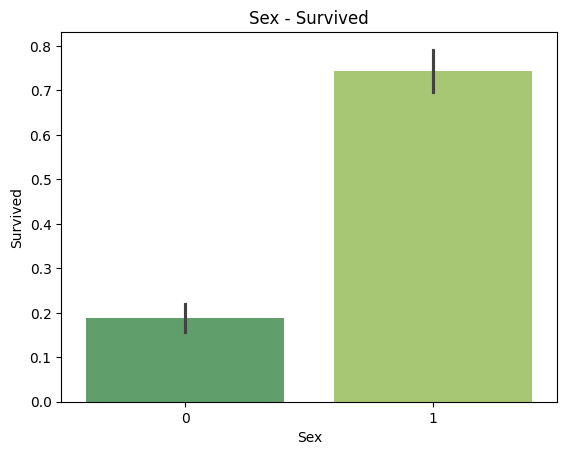

In [30]:
sns.barplot(x='Sex', y='Survived', data=df, palette='summer')
plt.title('Sex - Survived')
plt.show()

Let's look how a combination of a person's gender and ticket class (Pclass) affect survival rates

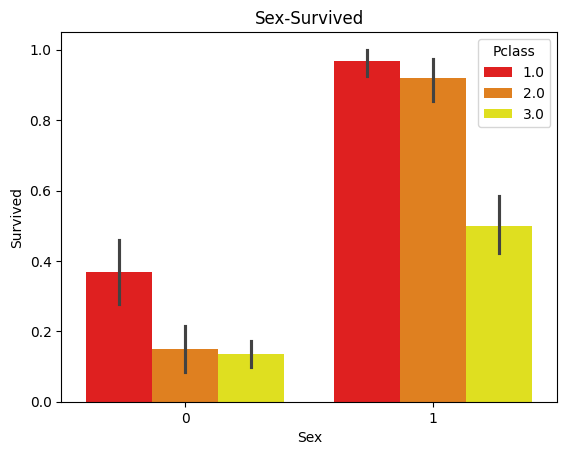

In [32]:

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, palette="autumn")
plt.title("Sex-Survived")
plt.show()

Another useful type of visualization is the box plot box. Let's look at a box plot that reflects the distribution of passengers by gender and age.

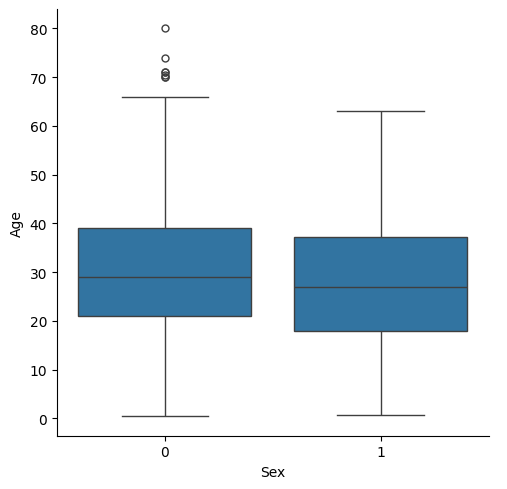

In [34]:
sns.catplot(x="Sex", y="Age", data=df, kind="box")
plt.show()

We can detail the picture by adding Pclass separation.

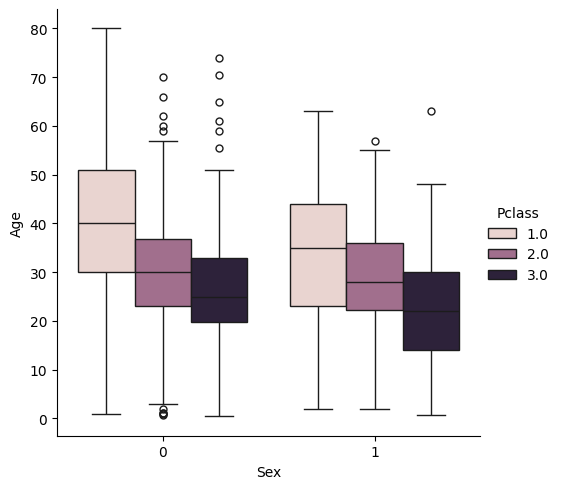

In [36]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=df, kind="box")
plt.show()

## Process the 'Embarked' feature

In [39]:
print(df["Embarked"].value_counts(dropna=False))
df.shape

Embarked
S      641
C      168
Q       75
NaN      2
Name: count, dtype: int64


(886, 12)

### Task 6 (0.5pt)
Remove passengers from the table for whom the port of embarkation (Embarked) is unknown.

In [42]:
print(df["Embarked"].value_counts(dropna=False))
df.dropna(subset=["Embarked"], inplace=True)
print(df.shape)

Embarked
S    641
C    168
Q     75
Name: count, dtype: int64
(884, 12)


Let's convert the categorical column to numeric columns using One-Hot Encoding, namely, create three numeric columns as follows:

In [46]:

df["EmbS"] = df.apply(lambda row: 1 if row.Embarked == "S" else 0, axis=1)
df["EmbC"] = df.apply(lambda row: 1 if row.Embarked == "C" else 0, axis=1)
df["EmbQ"] = df.apply(lambda row: 1 if row.Embarked == "Q" else 0, axis=1)

This operation can be done using the `get_dummies` method.

In [45]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


### Task 7 (0.5pt)
Remove the categorical column `Embarked` from the table and add new columns to it, obtained using `get_dummies`.

In [54]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

KeyError: 'Embarked'

## Process the 'Age' feature

Check if `Age` has any missing values.

In [57]:

df.Age.isna().sum()

np.int64(0)

Let's fill in the blanks with the median `Age` value.

In [59]:

median_age = df["Age"].median()
df["Age"].fillna(median_age,inplace=True)

<ipython-input-59-6207ab89b255>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(median_age,inplace=True)


Let's plot the age distribution of the passengers.

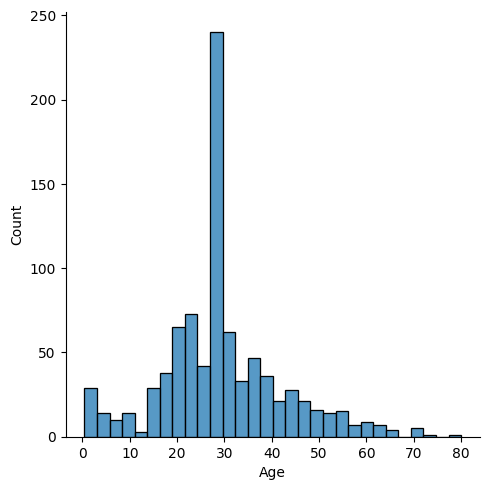

In [62]:

sns.displot(df["Age"], kde=False)
plt.show()

We can also look at the age distribution of `Pclass`.

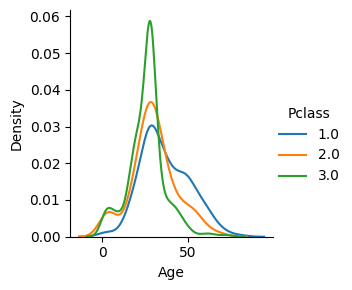

In [64]:

import seaborn as sns

facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();

### Process the 'Fare' feature (0.5pt)

1) Check if there are any missing values in `Fare`

2) If there are missing values, fill them with the _median_ value of `Fare`

In [66]:
print(df["Fare"].isnull().sum())
if df["Fare"].isnull().any():
  median_fare = df["Fare"].median()
  df["Fare"].fillna(median_fare,inplace=True)

0


### Process the 'Pclass' feature

Are there any missing values in `Pclass`?

In [67]:
df['Pclass'].value_counts(dropna=False)

,count
Pclass,
3.0,487
1.0,214
2.0,183


### Task 8 (0.5pt)
Draw a histogram of survival rates as a function of `Pclass`.

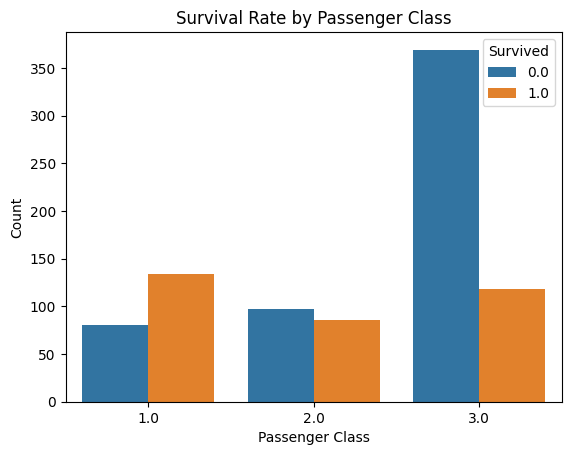

In [68]:
sns.countplot(x="Pclass", hue="Survived", data =df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

### Process the feature 'SibSp' (number of siblings, husbands, wives)

Are there any missing values in `SibSp`?

In [69]:
print(df["SibSp"].isnull().sum())

0


### Task 9 (0.5 pt)
The `PassengerId` column is categorical and does not carry important information, delete it.

In [71]:
df.drop("PassengerId", axis=1, inplace=True)

## **Additional Task - 2.5 pt**  

You have now gained experience in **handling missing data, encoding categorical features, and visualizing data**. Let’s put everything together and apply your skills to a **real-world challenge**.  

---  

**You Are a Loan Officer at a Major Bank**

Your job is to **analyze loan approval trends** to help your bank make better lending decisions.  

**The Manager's Belief:**  
Your manager believes that **people with higher credit scores** always get approved for loans.  

**However**, you think other factors (like employment status and income) play a big role too! To prove your point, you need to **analyze the data and create visualizations**.  

---  

# Your Task:

To convince your manager, you need to:  

1 - **Clean the dataset** by handling missing values. (Credit Score)  
2 - **Convert categorical values into numbers** using encoding. (Emplyment Status)  
3 - **Create a box plot** comparing Credit Scores between approved and denied loans.  
4 - **Comment on the results** — does Credit Score **guarantee** approval, or do other factors matter?  

---  

**Important Details:**  
- Customers **without a recorded Credit Score** should be removed from the analysis.  
- Your manager **does not trust loans under $1,000**, so exclude them from the dataset.  


In [95]:
# Load the dataset
df = pd.read_csv("Loan_Dataset.csv")
df.head()


,Age,Income,Credit_Score,Employment_Status,Loan_Amount,Loan_Approved
0,56,23343,NaN,Employed,45139,1
1,69,33500,432.0,Employed,49713,1
2,46,73222,NaN,NaN,30734,1
3,32,49375,483.0,Employed,8052,1
4,60,29662,700.0,NaN,4654,0


In [86]:
# Remove rows where Credit Score is missing
df.dropna(subset=["Credit_Score"], inplace=True)

In [87]:
# Remove loans under $1,000
df = df[df["Loan_Amount"]>=1000]


In [92]:
# Convert Employment Status into numbers
employment_dummies = pd.get_dummies(df["Employment_Status"], prefix="Employment")
df = pd.concat([df, employment_dummies], axis=1)

Text(0.5, 0, 'Loan Status')

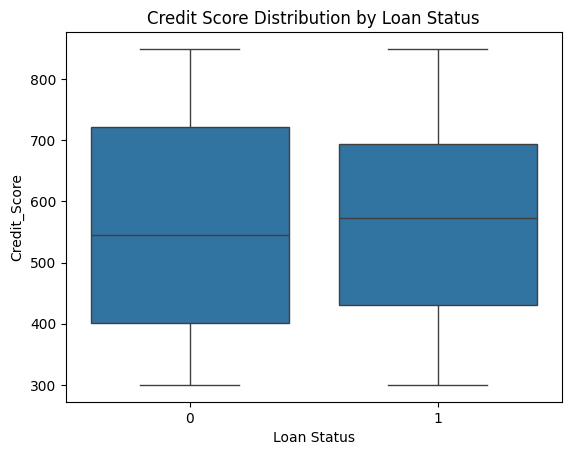

In [96]:
# Create box plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="Loan_Approved", y="Credit_Score", data=df)
plt.title("Credit Score Distribution by Loan Status")
plt.xlabel("Loan Status")


# Theoretical Questions- 2.5 pt

Answer the following questions based on your coding implementation and analysis in this assignment.  

1 - Why do we use `.fillna()` with `median()` for numerical values and `mode()` for categorical values when handling missing data?


R/ We use the median() for numerical because is less sensitivie to outliers than the mean, providing a more robust and of course central value; on the other hand mode() for categorical represents the most frequent category, which is a logical imputation for categorical data instead.

2 - What is the purpose of replacing categorical text values (e.g., "Employed", "Unemployed") with numbers in the dataset? Describe how this affects machine learning models and why `.replace()` or one-hot encoding is used.


R/ Machine learning models generally work with numerical data, therefore replacing text values with numbers allows the model to interpret and process the cateogircal information. .replace() is used for ordinal encoding(when there is an order in the categories) and one-hot on the other hand is for encoding.

3 - In the box plot comparing Credit Score and Loan Approval, what does the distribution tell us?


R/ The distribution shows the relationship between Credit Score and Loan Approval.
If there is a clear difference in medians and little overlap between the boxes, it suggests that Credit Score is an important factor for approval. If there is a lot of overlap, other factors could also be relevant.

4 - Why do we exclude loans under $1,000 from the dataset? How might this impact our analysis?  


R/ We exclude them because the manager doesn't trust them. This could bias the analysis by excluding a segment of loans, potentially those with different risk characteristics or approval patterns.

5 - What would happen if we didn’t remove missing values from the Credit Score column before visualization?


R/ The box plot would not be generated correctly, as sns.boxplot() does not handle missing values. An error or an incomplete visualization would result. Also, the results of the analysis could be skewed by including incomplete data.
